In [1]:
import math
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf
import keras as k
print(tf.__version__)
print(k.__version__)

2.9.1
2.9.0


In [2]:
IMAGE_SIZE = [224, 224]

In [3]:
train_directory='C:/Users/Srimanth/OneDrive/Desktop/Projects/Mini Project/StreamLit/Bird_Species_Classification_Streamlit-master/train'
test_directory='C:/Users/Srimanth/OneDrive/Desktop/Projects/Mini Project/StreamLit/Bird_Species_Classification_Streamlit-master/test'
val_directory='C:/Users/Srimanth/OneDrive/Desktop/Projects/Mini Project/StreamLit/Bird_Species_Classification_Streamlit-master/valid'

In [4]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [5]:
folders = glob('C:/Users/Srimanth/OneDrive/Desktop/Projects/Mini Project/StreamLit/Bird_Species_Classification_Streamlit-master/train/*')
len(folders)

450

In [6]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [7]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [8]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [9]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_directory,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_directory,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 70626 images belonging to 450 classes.
Found 2250 images belonging to 450 classes.


In [10]:
print(len(training_set))
print(len(test_set))
print(len(training_set)/len(test_set))

2208
71
31.098591549295776


In [11]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
2208/2208 [==============================] - 8610s 4s/step - loss: 5.9527 - accuracy: 0.3260 - val_loss: 3.5207 - val_accuracy: 0.5836
Epoch 2/10
2208/2208 [==============================] - 8037s 4s/step - loss: 3.7107 - accuracy: 0.5682 - val_loss: 3.1733 - val_accuracy: 0.6422
Epoch 3/10
2208/2208 [==============================] - 8872s 4s/step - loss: 3.0948 - accuracy: 0.6461 - val_loss: 2.9023 - val_accuracy: 0.6920
Epoch 4/10
2208/2208 [==============================] - 8375s 4s/step - loss: 2.6223 - accuracy: 0.7026 - val_loss: 3.1117 - val_accuracy: 0.7156
Epoch 5/10
2208/2208 [==============================] - 8018s 4s/step - loss: 2.3370 - accuracy: 0.7397 - val_loss: 3.0387 - val_accuracy: 0.7267
Epoch 6/10
2208/2208 [==============================] - 8021s 4s/step - loss: 2.0597 - accuracy: 0.7692 - val_loss: 3.0496 - val_accuracy: 0.7440
Epoch 7/10
2208/2208 [==============================] - 8079s 4s/step - loss: 1.9012 - accuracy: 0.7890 - val_loss: 2.9479 -

# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

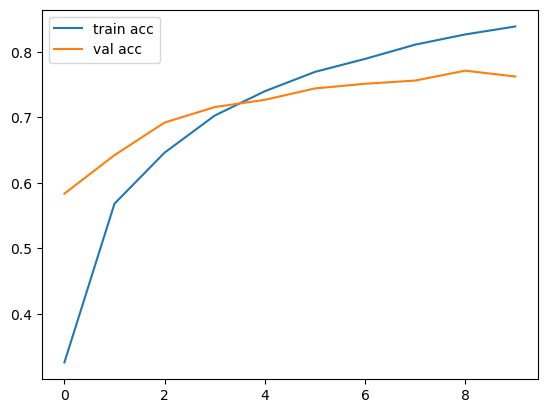

In [12]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [13]:
model.save('BC.h5')

In [14]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras import models
model1 = models.load_model('./BC.h5',compile=False)  

In [15]:
lab = training_set.class_indices
lab={k:v for v,k in lab.items()}

In [16]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model1.predict(img)
    y_class = answer.argmax(axis=-1)
    print(y_class)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = lab[y]
    return res

In [1]:
img='C:/Users/Srimanth/OneDrive/Desktop/test1.jpg'
pic=load_img(img,target_size=(224,224,3))
plt.imshow(pic)
output(img)

NameError: name 'load_img' is not defined